In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df= pd.read_csv('/content/gender_classification_v7.csv')

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
df.describe

<bound method NDFrame.describe of       long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  distance_nose_to_lip_long  gender  
0             1                          1    Male  
1             1                          0  Female  
2             1                          1    Male  
3             1                          1    Male  
4             0                          0  Female  
...         ...                        ...     ...  
4996          0                          0  Female  
4997          0                          0  Female  
4998          0                          0  Female  
4999          0                          0  Female  
5000          1                          1    Male  

[5001 rows x 8 columns]>

In [6]:
df.isnull().sum()

,0
long_hair,0
forehead_width_cm,0
forehead_height_cm,0
nose_wide,0
nose_long,0
lips_thin,0
distance_nose_to_lip_long,0
gender,0


In [22]:
print(df['gender'].unique())


['Male' 'Female']


In [23]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [24]:
print(df['gender'].unique())

[1 0]


<Axes: >

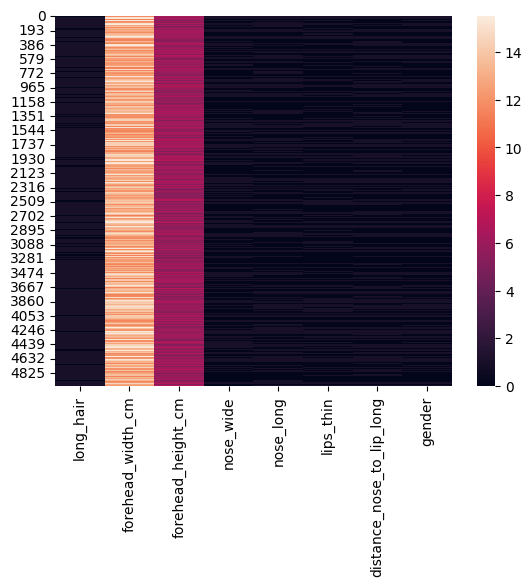

In [26]:
sns.heatmap(df)


Text(0.5, 1.0, 'Gender Distribution')

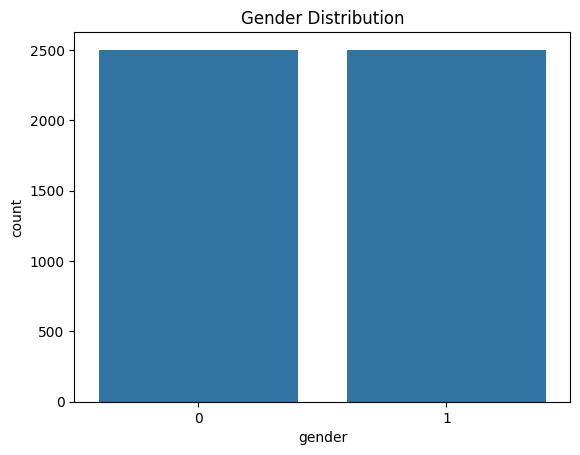

In [27]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Correlation Matrix')

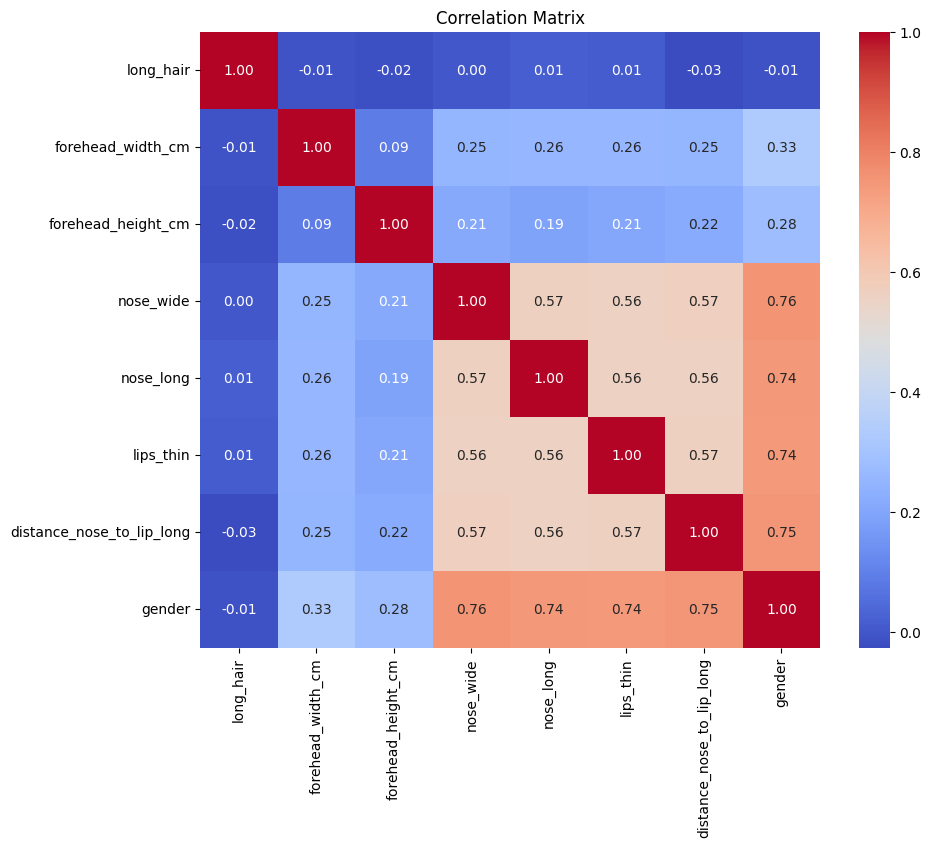

In [28]:
corr = df.corr()

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

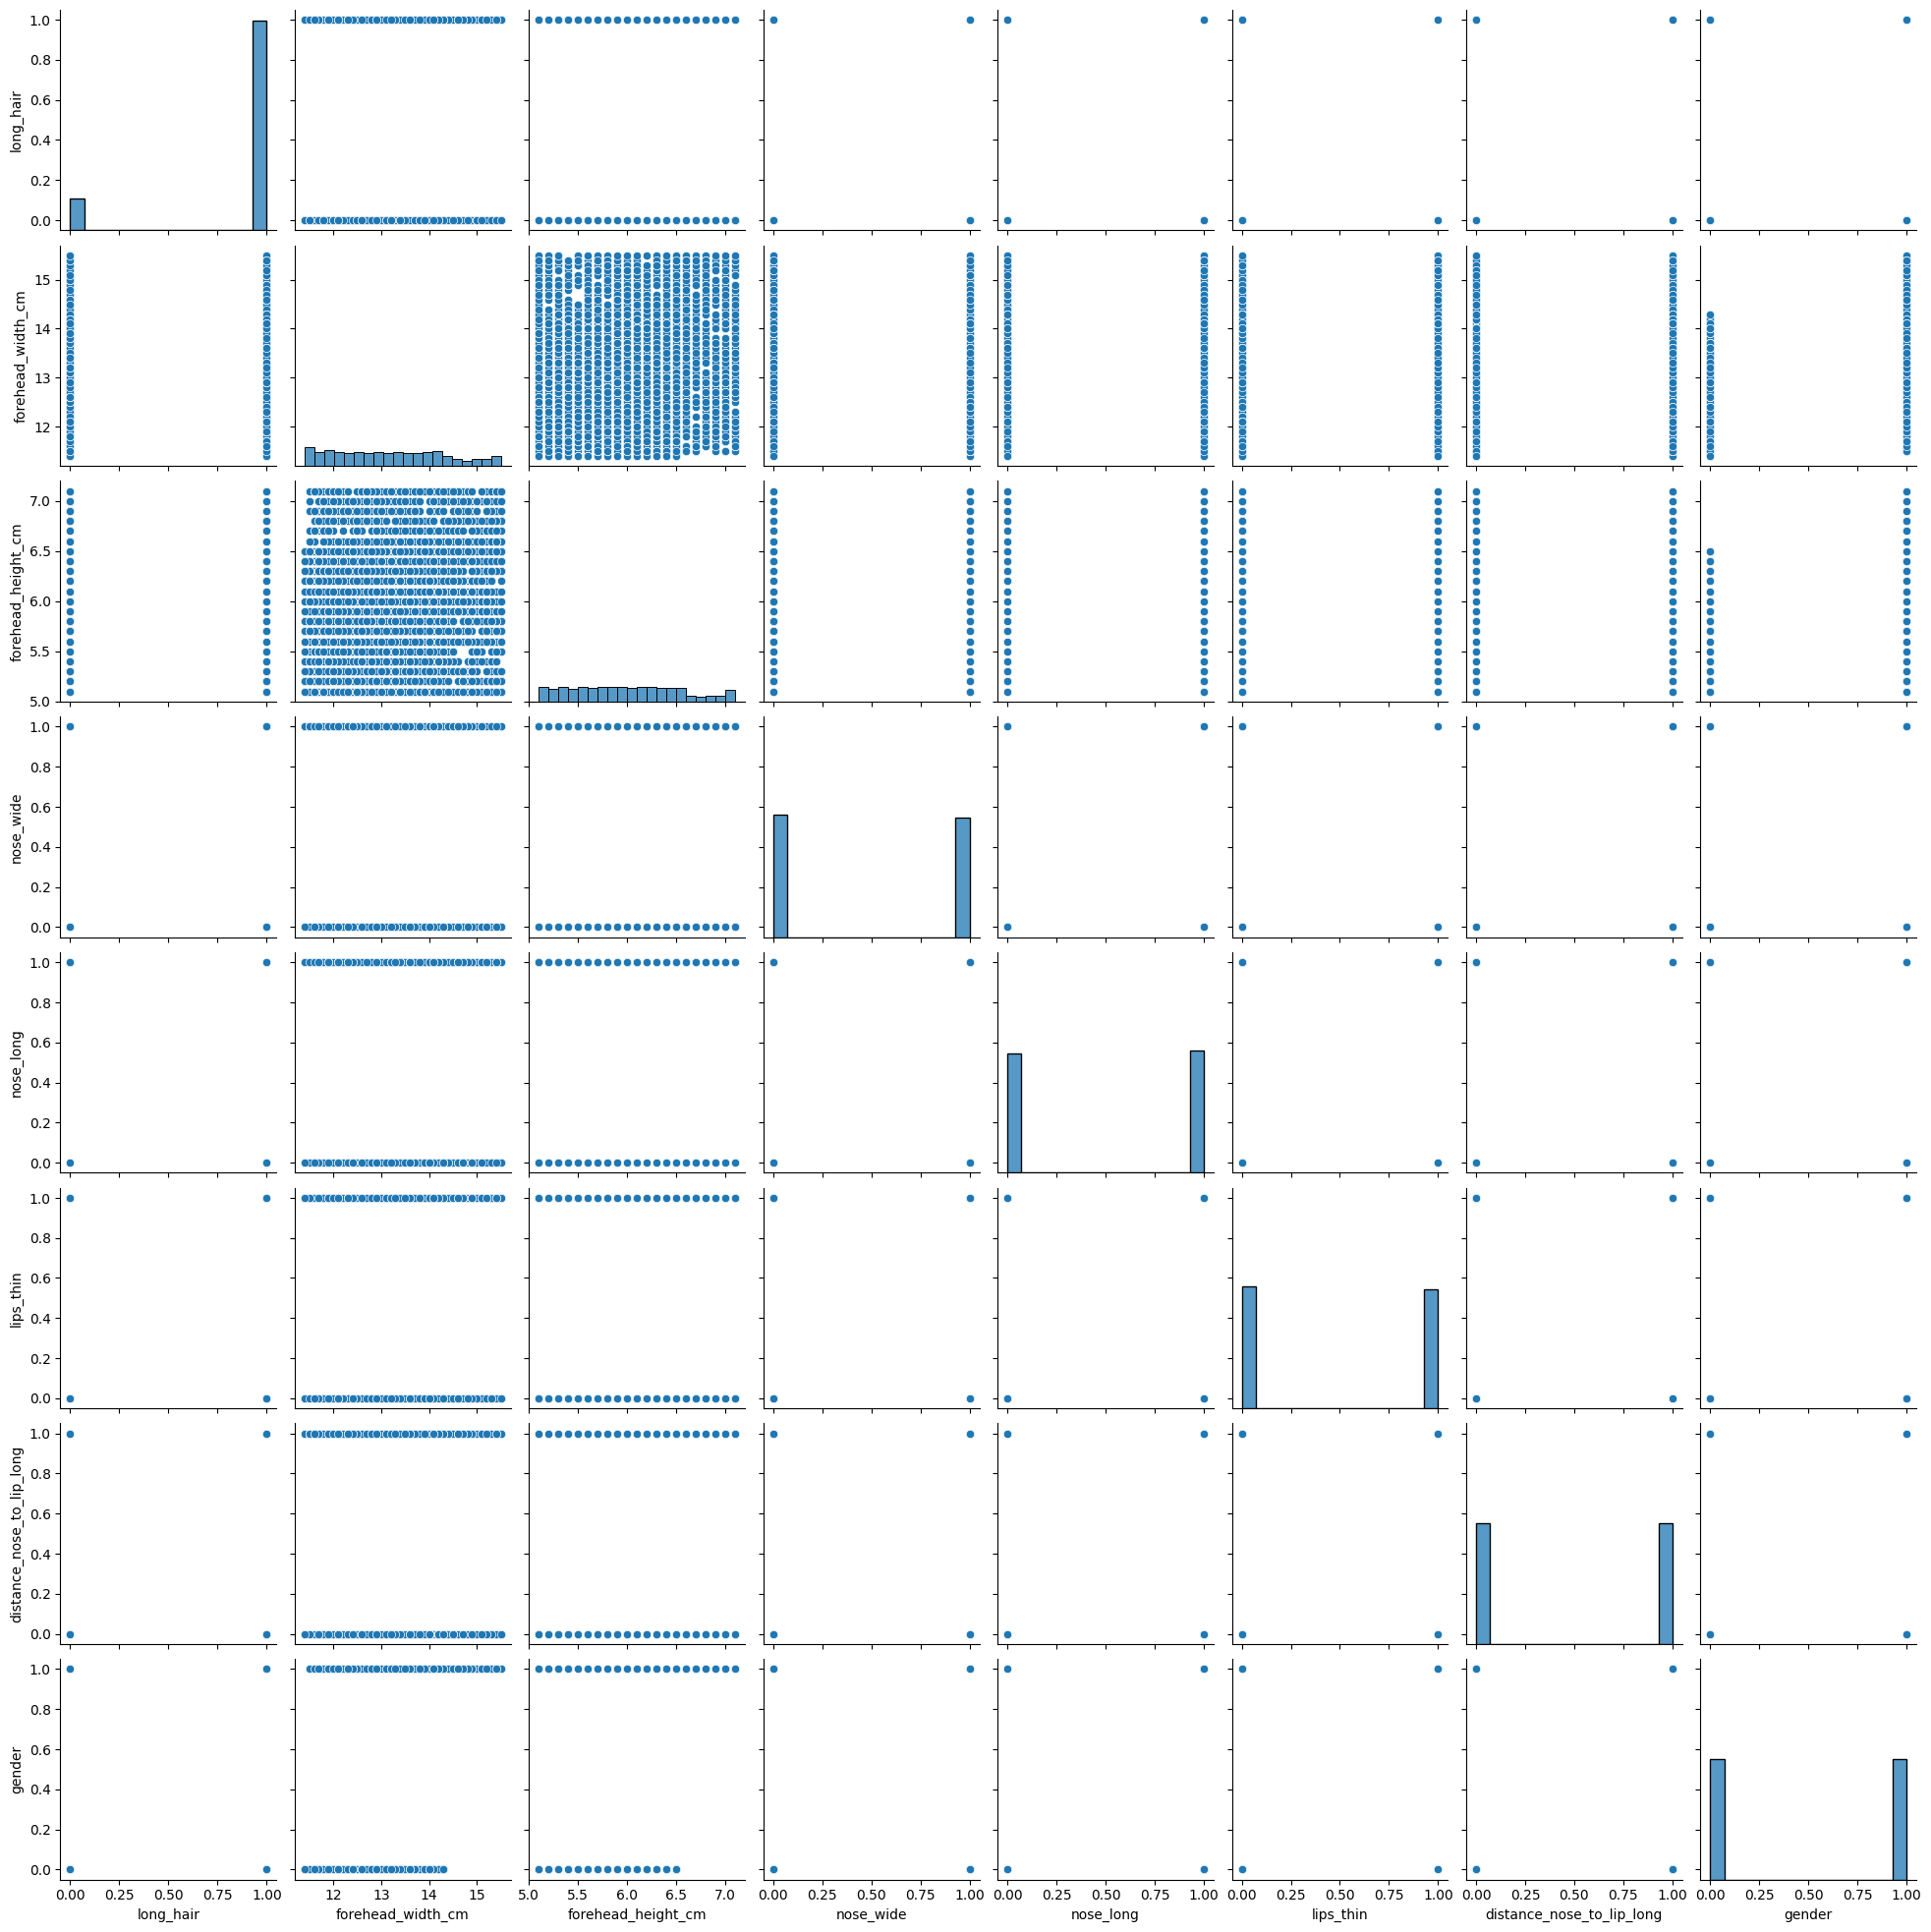

In [29]:
sns.pairplot(df)
plt.show()

In [30]:
grouped_df = df.groupby('gender').mean()
print(grouped_df)

        long_hair  forehead_width_cm  forehead_height_cm  nose_wide  \
gender                                                                
0        0.873251          12.811675            5.796321   0.114754   
1        0.866000          13.551440            6.096360   0.873200   

        nose_long  lips_thin  distance_nose_to_lip_long  
gender                                                   
0        0.135946   0.121551                   0.121551  
1        0.880000   0.864800                   0.876400  


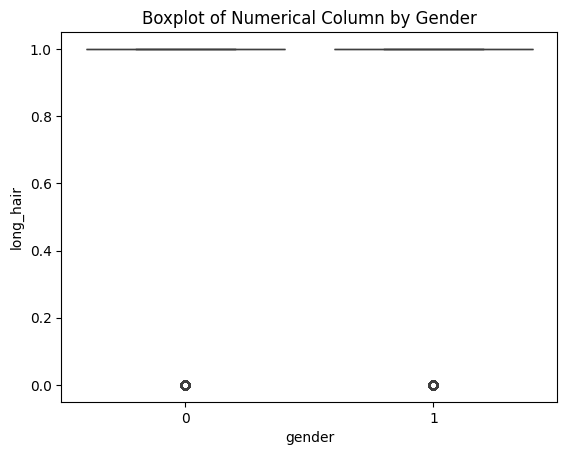

In [32]:
sns.boxplot(x='gender', y='long_hair', data=df)  # Replace 'numerical_column' with your actual column
plt.title('Boxplot of Numerical Column by Gender')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
X = df.drop(columns=['gender'])
y = df['gender']


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.0419077506714738
R-squared: 0.8323674916343946


In [42]:
pip install joblib


In [43]:
from joblib import dump

# Save the model to a file
dump(model, 'linear_regression_model.joblib')


['linear_regression_model.joblib']

In [44]:
from joblib import load

# Load the model from the file
loaded_model = load('linear_regression_model.joblib')
